In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
X = X/255

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, shuffle=True)

In [10]:
from sklearn.base import BaseEstimator
import numpy as np
import statistics
from sklearn.metrics import accuracy_score

class knn(BaseEstimator):

    def __init__(self,k=5):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def __supp(self, x):

        distances = np.linalg.norm(x - self.X_train, axis=1)
        neighbors_y = self.y_train[np.argsort(distances)[:self.k]]

        return statistics.mode(neighbors_y)



    def predict(self, X_test):
        X_test = np.array(X_test)
        predict = np.array([])
        #i = 0

        for x in X_test:
            #i += 1
            predict = np.append(predict, self.__supp(x))
            #if (i % 100 == 0):
            #    print(f"{i} iteration")
        return predict

    def score(self, X, y):
        pred = self.predict(X)
        return accuracy_score(y, pred)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train_cv = X_train[:10000]
y_train_cv = y_train[:10000]


model = knn()
parameters = { 'k': [ 5, 10, 15, 20]}

        
tuned_model = GridSearchCV(model, parameters, cv=10, verbose=0)
tuned_model.fit(X_train_cv, y_train_cv.values.ravel())

print ("Best Score: {:.3f}".format(tuned_model.best_score_) )
print ("Best Params: ", tuned_model.best_params_)

Best Score: 0.949
Best Params:  {'k': 5}


In [13]:
#Create a KNN Classifier
clf = knn(k=5) 

#Train the model using the training sets
clf.fit(X_train, y_train)

In [14]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [15]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9719


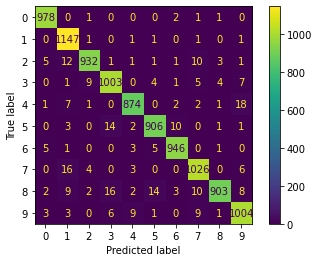

In [16]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[x for x in range(10)])
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[x for x in range(10)])
display.plot()

In [2]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

y_pred_2 = model.predict(X_test)